<a href="https://colab.research.google.com/github/DhafinRA/Apriori/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import os

### PREPROCESS DATA

In [2]:
#Raw Dataset
df = pd.read_csv('https://raw.githubusercontent.com/DhafinRA/Apriori/refs/heads/main/servis_bebek.csv')

# menampilkan 5 data teratas dari data frame
df.head()

,ServTransCode,ServTransDate,Items,NameOfServ,qty,profit
0,SRV001912080003,08/12/2019,Oli Mesin Matic,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
1,SRV001912080003,08/12/2019,Grease Cvt,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
2,SRV001912080003,08/12/2019,Handel Variasi,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
3,SRV001912080003,08/12/2019,Air Radiator,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0
4,SRV001912120004,12/12/2019,Oli Gardan,SERVICE INJEKSI MANUAL BEBEK/MATIC,1,0


In [3]:
# Menghilangkan spasi dalam data
df['Items'] = df['Items'].str.strip()

In [4]:
#Menampilkan Informasi Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ServTransCode  123 non-null    object
 1   ServTransDate  123 non-null    object
 2   Items          123 non-null    object
 3   NameOfServ     123 non-null    object
 4   qty            123 non-null    int64 
 5   profit         123 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 5.9+ KB


In [5]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
ServTransCode    0
ServTransDate    0
Items            0
NameOfServ       0
qty              0
profit           0
dtype: int64


In [6]:
df.describe()

,qty,profit
count,123.000000,123.0
mean,1.105691,0.0
std,0.380099,0.0
min,1.000000,0.0
25%,1.000000,0.0
50%,1.000000,0.0
75%,1.000000,0.0
max,3.000000,0.0


In [7]:
#Mengubah Tipe Data Menjadi Datetime
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'], dayfirst=True, errors='coerce')

#Menampilkan Informasi Dataframe kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ServTransCode  123 non-null    object        
 1   ServTransDate  123 non-null    datetime64[ns]
 2   Items          123 non-null    object        
 3   NameOfServ     123 non-null    object        
 4   qty            123 non-null    int64         
 5   profit         123 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.9+ KB


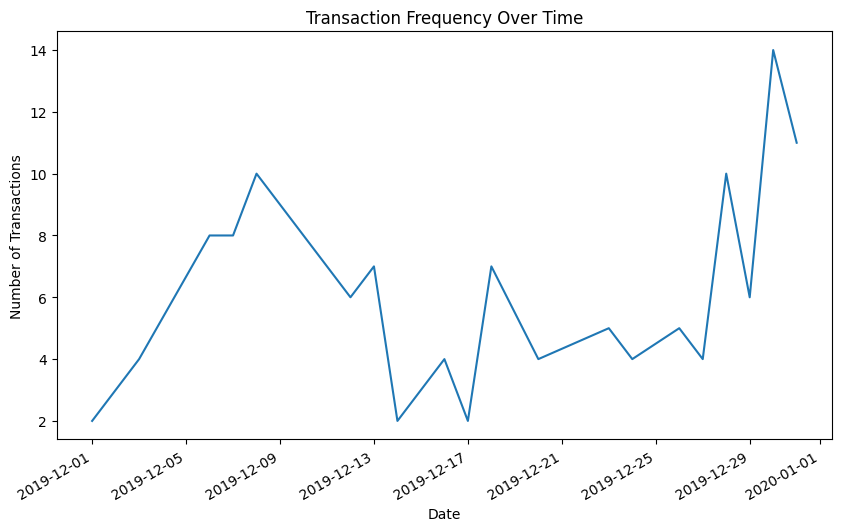

In [8]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan Distribusi Transaksi
plt.figure(figsize=(10, 6))
df['ServTransDate'] = pd.to_datetime(df['ServTransDate'])  # Convert to datetime
df['ServTransDate'].value_counts().sort_index().plot(kind='line')
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

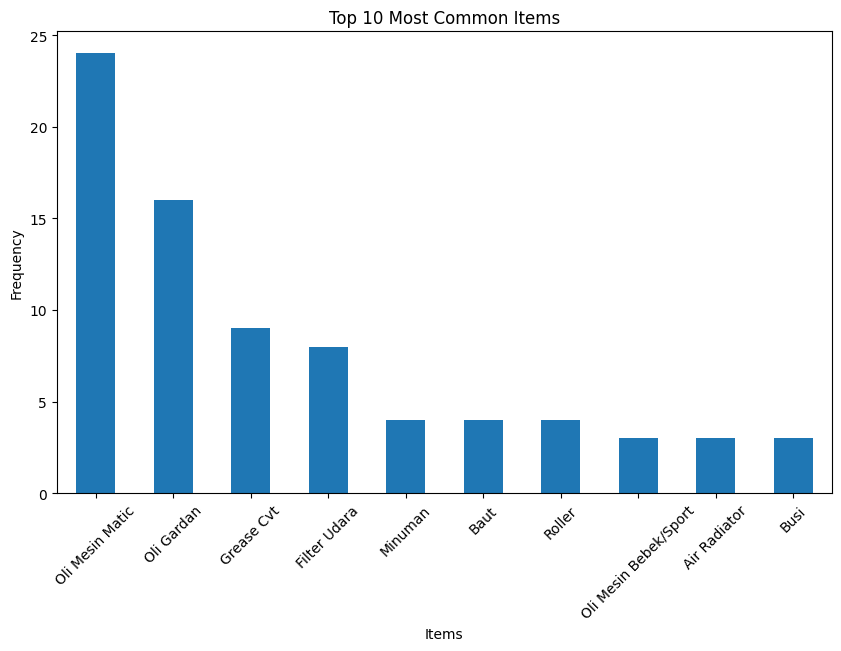

In [9]:
# Menampilkan distribusi barang penjualan
plt.figure(figsize=(10, 6))
df['Items'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Items')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### APRIORI DAN ASOSIASI

In [10]:
#Mengeblompokkan transaksi berdasarkan kolom ServTransCode untuk kolom Items
transaksi = df.groupby('ServTransCode')['Items'].apply(list)

#Mengubah data menjadi bentuk one-hot encoding
te = TransactionEncoder()
tf_encode = te.fit(transaksi).transform(transaksi)
tf_df = pd.DataFrame(tf_encode, columns= te.columns_)

tf_df.head()
#print(tf_df.head())


,Air Radiator,Aki,As Shock,Ban Motor Matic,Baut,Bearing Cvt,Bohlam Depan,Bohlam Sen,Bohlam Stop,Busi,...,Roller Beat,Rumah Roller,Seal Pully Belakang,Seal Pully Depan,Seal Shock Bebek,Selang Bensin,Shock Belakang,Spakbor Depan,Spi Plastik Tameng Kecil,V-Belt
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
#Memasukkan Algoritma Apriori
frequent_itemsets = apriori(tf_df, min_support=0.1, use_colnames=True)

frequent_itemsets

# menaruh hasil kedalam folder data
# folder_name = 'data'
# file_path = os.path.join(folder_name, 'hasil_apriori_up_3.xlsx')
# frequent_itemsets.to_excel(file_path, index=False)

,support,itemsets
0,0.222222,(Filter Udara)
1,0.250000,(Grease Cvt)
2,0.111111,(Minuman)
3,0.444444,(Oli Gardan)
4,0.666667,(Oli Mesin Matic)
5,0.111111,(Roller)
6,0.138889,"(Grease Cvt, Oli Gardan)"
7,0.222222,"(Oli Mesin Matic, Grease Cvt)"
8,0.111111,"(Minuman, Oli Mesin Matic)"
9,0.444444,"(Oli Mesin Matic, Oli Gardan)"


In [ ]:
# memasukkan Association Rules dengan menggunakan K1 1-itemset
ass_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1, num_itemsets=1)
#Filtering kolom penting
ass_rules_col = ass_rules[['antecedents', 'consequents', 'support', 'confidence','lift' ]]
ass_rules_col

# Antecedents
# Item atau kelompok item yang menjadi kondisi awal dalam aturan asosiasi. 
# Misalnya, (Oli Mesin Matic) menunjukkan bahwa aturan dimulai dari pembelian "Oli Mesin Matic".

# Consequents
# Item atau kelompok item yang menjadi hasil dari aturan asosiasi. 
# Misalnya, (Baut) berarti "Baut" cenderung dibeli setelah "Oli Mesin Matic".

# Support
# Proporsi transaksi yang mengandung antecedents dan consequents secara bersamaan. 
# Misalnya, 0.083333 menunjukkan bahwa 8,33% transaksi mengandung "Oli Mesin Matic" dan "Baut".

# Confidence
# Probabilitas bahwa consequents terjadi jika antecedents terjadi. 
# Misalnya, 0.125000 menunjukkan bahwa jika "Oli Mesin Matic" dibeli, ada 12,5% kemungkinan "Baut" juga dibeli.

# Lift
# Rasio pengaruh aturan dibandingkan dengan kejadian independen. Lift > 1 menunjukkan hubungan positif antara antecedents dan consequents. 
# Misalnya, 1.500000 menunjukkan bahwa pembelian "Baut" lebih mungkin terjadi jika "Oli Mesin Matic" dibeli.

# folder_name = 'data'
# file_path = os.path.join(folder_name, 'hasil_asosiasi.xlsx')
# ass_rules_col.to_excel(file_path, index=False)



In [46]:
#Sorting berdasarkan Lift
ass_sort= ass_rules_col.sort_values(by = 'lift', ascending = False)
ass_sort.head()

folder_name = 'data'
file_path = os.path.join(folder_name, 'sorted_asosiasi.xlsx')
ass_sort.to_excel(file_path, index=False)

### VISUALISASI HASIL

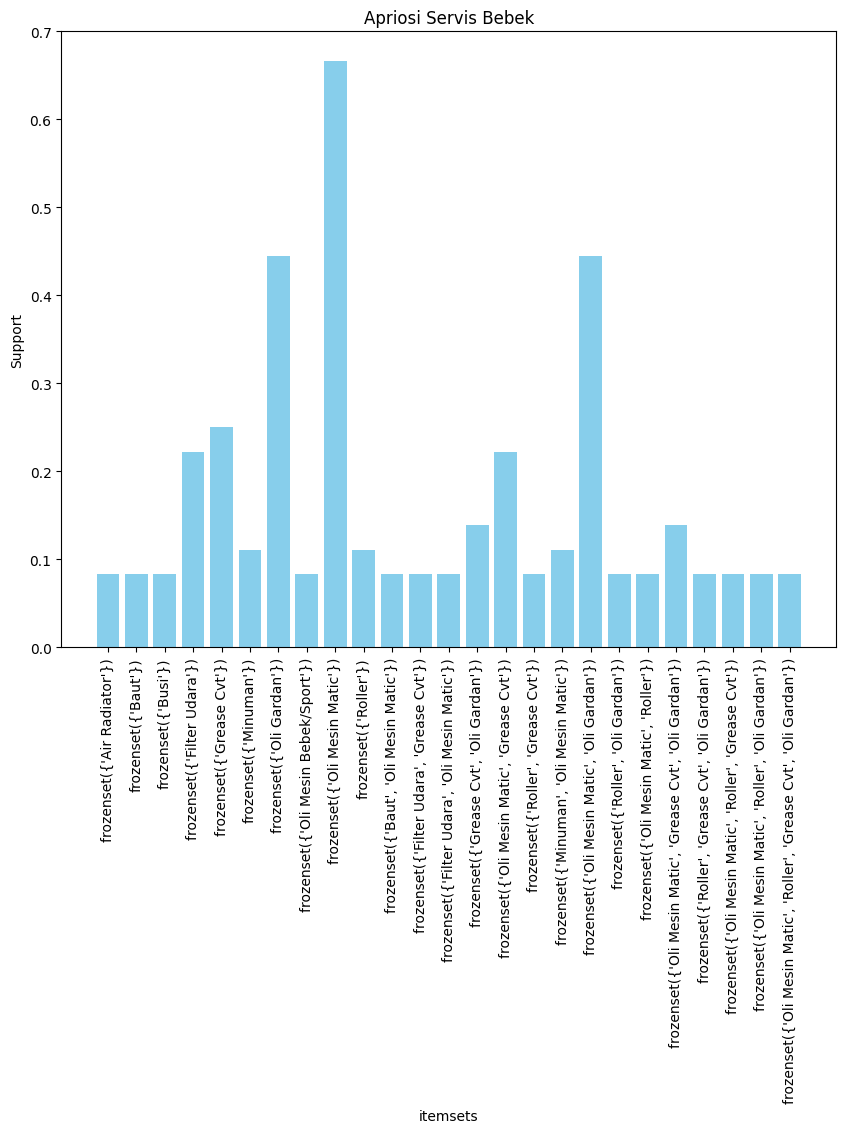

In [14]:
#Visualisasi Bar chart
plt.figure(figsize=(10,8))
plt.bar(frequent_itemsets['itemsets'].astype(str), frequent_itemsets['support'], color='skyblue')
plt.xlabel('itemsets')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.title('Apriosi Servis Bebek')
plt.show()